<p style="text-align: center;">
<b style="font-size: 40px;">Mapeos del intervalo</b> <br>
<b style="font-size: 20px;">Mauricio Sandoval Cuenca</b> <br> 
<b style="font-size: 15px;">Junio 2020</b> <br>
</p>

# Sistemas Dinamicos Discretos
## Iteraciones
Si buscamos el significado de la palabra iteración encontramos que se reduce a las palabras: *repetición* y *reiteración*, pues bien, eso es precisamente la base de los sistemas dinámicos. En particular, estamos interesados en estudiar ciertas funciones y la repetición se hará por medio de su composición. Entonces podemos resumir el objeto de estudio de los sistemas dinámicos a las sucesiones de valores que resultan de iterar una función: $f(x),\ f(f(x)),\ f(f(f(x))),...$

En este primer momento no debemos caer en la trampa de confundir simplicidad con sencillez, así como también hay que aprender a distinguir complejidad de complicación. Pues bien, veremos que para el caso de los sistemas dinámicos, nos encontramos con sistemas complejos y sencillos, pues a pesar de no estar basados en un fundamento complicado, contienen una basta cantidad de resultados que son completamente inesperados para la intuición.

Como bien lo dijimos, el estudio de los sistemas complejos tiene como principal interés estudiar las iteraciones de una función, por lo tanto, será necesario que desde un principio le demos una definición a este concepto para manejarlo con soltura. 

A lo largo de este artículo trabajaremos con funciones continuas reales de variable real.

### Definición (Órbita)
*Definimos la órbita de una función $f:\mathbb R \to \mathbb R$ en el punto $x$ como el conjunto* $$O_f(x)=\{x,\ f(x),\ f^2(x),\ f^3(x),\ ... \}$$
    
donde hemos usado la notación $f^n(x)$ para denotar la $n$-ésima composición de la función $f$, *e.g.* $f^3(x)=f(f(f(x)))$. Cuando sea clara la función $f$ de la cual estamos hablando escribiremos simplemente $O(x)$. Es muy importante que tengamos claro que la definición de órbita *es puntual* y por lo tanto tenderá a cambiar conforme evaluémos en distintos puntos del dominio de $f$, al valor $x$ para el cual evaluemos la órbita será llamado *condición incial*.

En Python, se puede programar la iteración de una función para obtener su órbita (solo una cantidad finita de puntos) sobre una condición incial. La forma más sencilla para hacer esto es a través del comando `for`. A continuación mostramos la órbita de la función $f(x)=\sqrt{x}$ en el punto $x=0.2$.

In [1]:
x0 = 0.2    # Condición inicial
n = 10    # Número de iteraciones

for i in range(n+1):  # Iniciamos el loop para repetir el proceso hasta el tiempo 10
    print(x0)         # Imprimimos el valor actual de x
    x1 = x0 ** 0.5     # Definimos la función f(x) = 2x
    x0 = x1           # Actualizamos los valores de las variables para iterar
    

0.2
0.4472135954999579
0.668740304976422
0.8177654339579425
0.9043038394024115
0.9509489152433014
0.975166096233509
0.9875049854221036
0.993732854152515
0.9968615019913825
0.9984295177885029


Observemos que en este caso, la órbita parece acercarse cada vez más a 1, más adelante estudiaremos este tipos de comportamientos.

Otra forma más 'compacta' para obtener el mismo resultado es a través la definición de una función que tenga como parámetros a la condición inicial y al número de iteraciones, su programa en Python se puede observar a continuación.

In [2]:
def f(x0, n):
    for i in range(n+1):
        print(x0)
        x1 = x0 ** 0.5 
        x0 = x1
    
f(.2, 10)

0.2
0.4472135954999579
0.668740304976422
0.8177654339579425
0.9043038394024115
0.9509489152433014
0.975166096233509
0.9875049854221036
0.993732854152515
0.9968615019913825
0.9984295177885029


Como suele hacerse en matemáticas comenzamos estudiando las propiedades más sencillas que nos permitan hacer generalizaciones. La siguiente definición se puede motivar de estudiar la función más simple, la identidad. En este caso, si $f(x)=x$, es claro que para cualquier valor inicial $c$, $O_f(c)=\{c,\ c,\ ...\}$ decimos entonces que, $c$ es un *punto fijo*.

### Definición (Punto Fijo)
*Dada una función $f$, un punto $x_0$ es un punto fijo si $f(x_0)=x_0$, en cuyo caso, $f^n(x_0)=x_0$ para toda $n$ y $O_f(x_0)=\{ x_0\}$.*

En este caso, como conocemos todos los elementos de la órbita de la función al rededor de un punto, decimos que *su dinámica esta completamente determinada*. 

La primera generalización que haremos a la definición de un punto fijo la podemos encontrar en el recíproco de la función identidad $f(x)=\frac{1}{x}$, obsérvese que en este caso, si $x$ es distinto de 1, las primeras iteraciones de la función nos dan como resultado:
$$ f(x)=\frac{1}{x}, f^2(x)= f(f(x)) = \frac{1}{\frac{1}{x}}=x, f^3(x) = f(f^2(x)))=\frac{1}{x}, f^4(x) =x,\ ... $$

Entonces, si $n$ es múltiplo de 2 tenemos que para cualquier valor $x_0$ que $f^n(x_0)=x_0$, o sea que $f^2(x_0)=f^4(x_0)=f^6(x_0)=...=x_0$, por lo que tenemos que $x_0$ es una especie de punto fijo cada dos iteraciones. A esto le llamamos un punto periódico de periodo 2, en general tenemos la siguiente definición.

### Definición (Punto Periódico)
*Se dice que un punto $x_0$ es periódico de periodo $n$, si $f^n(x_0)=x_0$. Al mínimo número positivo $n$ que satisfaga que $f^n(x_0)=x_0$ se le llama periodo primo.*

Debemos observar que un punto fijo es un punto periódico de periodo 1. Por otra parte, los puntos periódicos son de suma importancia porque forman ciclos en la dinámica que se repiten hasta volver al punto periódico, en el ejemplo  $f(x)=\frac{1}{x}$, tendríamos que la órbita de $f$ esta dada por $O(f)=\{\frac{1}{c},\ c,\ \frac{1}{c},\ c,\ ... \}$, o sea que su dinámica nuevamente esta completamente determinada, en general, para un punto periódico de periodo $n$ tendríamos que su órbita está determinada por las primeras $n-1$ iteraciones:
$$ O_f(x_0)=\{x_0,\ f(x_0),\ ...\ ,\ f^{n-1}(x_0),\ x_0,\ f(x_0),\ ...\ ,\ f^{n-1}(x_0),\ ...\} $$

### Método Gráfico
La manera más sencilla de estudiar y visualizar estas definiciones es por medio del *método gráfico*. Este consiste en ir rastreando los puntos de la órbita respecto a la gráfica de la función, el procedimiento es el siguiente: 
1. Graficamos conjuntamente a la función $y=f(x)$ y a la función identidad $y = x$. 
2. Rastreamos la órbita del punto $x_0$ como sigue: empezamos en el punto $(x_0,x_0)$ sobre la identidad y trazamos una recta vertical a la gráfica de $f$, intersecando en el punto $(x_0,f(x_0)) = (x_0, x_1)$. 
3. Luego trazamos una recta horizontal de vuelta a la gráfica de $f$, terminando en el punto $(x_1,x_1)$ nuevamente en la identidad. Este procedimiento nos lleva del punto en la identidad correspondiente al valor inicial $x_0$ a siguiente punto en la órbita $x_1$. 
4. Continuamos entonces desde $(x_1,x_1)$, primero verticalmente al punto $(x_1,x_2)$ y luego horizontalmente de regreso a la diagonal en $(x_2,x_2)$. Repitiendo este procedimiento vamos obteniendo los puntos de la órbita de $f$.

A continuación mostramos una posibilidad para realizar el análisis gráfico en Python utilizando las librerías `numpy` y `pyplot`. En este caso ilustramos la órbita de la función $f(x)=-x^2+1$ con el valor inicial $x_0=0$, que es precisamente un punto periódico de periodo 2. El código fue tomado de [6] aplicando ligeras modificaciones.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):     # Definición de la función
    return -x**2 + 1


# Modelado del sistema dinámico

def plot_system(x0, n, ax=None):
    # Gráfica de la función f y de la identidad
    t = np.linspace(0, 1)
    ax.plot(t, f(t), 'k', lw=2)
    ax.plot(t, t, 'r', lw=2)  # Segmento de la diagonal

    # Aplicar recursivamente y = f(x) y graficar los dos segmentos:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = f(x)
        # Grafica los dos segmentos.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Grafica las posiciones con opacidad creciente
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set(xlim=(0, 1), ylim=(0, 1))
    ax.axis('equal')
    ax.set_title(f"$f(x)=-x^2+1, x_0 = {x0:.1f} $")
    

fig, ax = plt.subplots(1, 1, figsize=(6, 6),
                               sharey=True)
plot_system(0, 10, ax=ax)

A partir del método gráfico también podemos observar como los puntos fijos son precisamente aquellos en donde se intersecan la función con la diagonal. En el ejemplo anterior, la función $f(x)=-x^2+1$ interseca a $y=x$ en $\frac{\sqrt{5}-1}{2}$, por lo tanto $x_0=\frac{\sqrt{5}-1}{2}$ es el único punto fijo de $f$.

Para ampliar aún más nuestras definiciones también podemos considerar órbitas como la siguiente $O(x)=\{ 2,.3,.7,.9,1,1,1,1,...\ \}$ en la que los primeros elementos varían pero a partir de la quinta iteración encontramos un punto fijo (o bien, un punto periódico), en el ejemplo anterior decimos que $x=1$ es un *punto eventualmente fijo*. Un ejemplo más concreto, lo encontramos en la función $f(x)=x^2$, en donde $O(-1)=\{-1,\ 1,\ 1,\ 1,\ ...\ \}$ por lo tanto $-1$ no es un punto fijo pero sí eventualmente fijo.

A continuación damos una definición formal de un *punto eventualmente periódico* (no olvidemos que los puntos fijos son puntos periódicos de periodo $1$).

### Definition (Punto Eventualmente Periódico)
*Un punto $x_0$ es eventualmente periódico de periodo $n$ si $x_0$ no es un punto periódico pero existe un número entero positivo $m$ tal que $f^{n+i}(x)=f^i(x)$ para toda $i\geq m$. Esto es, que $f^i(x)$ es periódico de periodo $n$ para toda $i\geq m$.*

Finalmente introducimos la noción de convergencia de la sucesión de puntos en la órbita de una función, en este caso se puede hacer una analogía con lo puntos de equilibrio para ecuaciones diferenciales ordinarias, la idea radica en la definición de puntos fijos atractores y repulsores.

### Definición (Atractor)
*Decimos que $x_0$ es un punto fijo atractor si $f(x_0)=x_0$ ($x_0$ es un punto fijo), y existe un intervalo $(a,b)$ en $\mathbb R$ con la propiedad de que para toda $x\in (a,b)$, $f^n(x)\in (a,b)$ para cada $n$, más aún $lim_{n\to \infty}f^n(x) = x_0$*

Similarmente, podemos definir a un punto fijo repulsor o inestable.

### Definición (Repulsor)
*Un punto $x_0$ es un punto fijo repulsor si existe un intervalo $(a,b)$ con $x_0\in (a,b)$ tal que todas todas las órbitas (excepto $x_0$) salen de $(a,b)$ con las iteraciones de $f$. Esto es, si existe $n\in \mathbb N$ tal que $f^n(x) \notin (a,b)$.*

Las funciónes $f(x) = x^2$ y $f(x) = \sqrt{x}$ son buenos ejemplos para ilustrar los puntos atractores y repulsores. Observemos en la siguiente imagen a $x_0 = 1$ como punto fijo, pero por un lado $f(x)=\sqrt{x}$ lo tiene como punto atractor, mientras que $f(x)=x^2$ lo tiene como repulsor. 

Cuando un punto no es atractor ni repulsor, decimos que es un *punto neutro*. Cuando un punto es atractor (repulsor) por la izquierda y repulsor (atractor) por la derecha, decimos que se trata de un *punto silla*.

![Atractor y repulsor](imagenes/atrac-rep.png)

Obsérvese como la diferencia entre ambas función radica en que por un parte $\sqrt{x}$ crece por debajo de la diagonal, mientras que $x^2$ crece por encima de ella. Este comportamiento no es casualidad, y lo podemos generalizar en la siguiente proposición que es concecuencia de aplicar el Teorema del Valor Medio y sirve para caracterizar a los puntos atractores y repulsores en términos de sus derivadas.

### Proposición
Suponga que $f$ tiene un punto fijo en $x_0$. Entonces:
1. $x_0$ es un atractor si $|f'(x_0)| < 1$
2. $x_0$ es un repulsor si $|f'(x_0)| > 1$
3. No se concluye nada de $x_0$ si $f'(x_0)=\pm 1$

*Demostración*

1. Supongamos $|f'(x_0)| < \nu < 1$. Elijamos $K$ con $\nu < K < 1$. Como $f'$ es contiua, podemos encontrar $\delta > 0$ tal que $|f'(x)| < K$ para todo $x$ en el intervalo $I=[ x_0 - \delta , x_0 + \delta ]$. Ahora, dado $x\in I$, por el Teorema del Valor Medio

    $$ \frac{f(x)-x_0}{x-x_0} = \frac{f(x)-f(x_0)}{x-x_0} = f'(c)$$
    
    para algún $c$ entre $x$ y $x_0$. Por lo tanto
    
    $$ |f(x) - x_0 | < K |x - x_0 | $$
    
    Se sigue que $f(x)$ se acerca más rápidamente a $x_0$ que a $x$, entonces $f(x)\in I$. Aplicando el mismo procedimeinto nuevamente 
    
    $$ |f(x) - x_0 | < K |x - x_0 | < K^2 |x - x_0 | $$
    
    Y siguiendo reiteradamente 
    
    $$ |f^n (x) - x_0 | < K^n |x - x_0 | $$

    Por lo tanto, $f^n(x)$ converge a $x_0$ en $I$, puesto que $0<K<1$.
    
2. La prueba es similar al caso anterior.

3. Con los siguientes ejemplos evidenciamos que no es posible concluir nada.
    1. $f(x) = x + x^3$
    2. $g(x) = x - x^3$
    3. $h(x) = x + x^2$
    
   Nótese que cada función tiene un punto fijo en $0$ y $f'(0) = 1$. Pero por medio de un análisis gráfico podemos observar que 0 es un punto repulsor para $f$, atractor para $g$ y $h$ es atractor por la izquierda y repulsor por la derecha, o sea, es un punto silla.
   
   ![Contraejemplo](imagenes/contraejemplo.png)
   
Nótese que además podemos encontar un resultado similar para ecuaciones diferenciales ordinarias para la derivada de un espacio vectorial en un punto de equilibrio, solo que el número cambia un poco.


Con las definiciones anteriores concluimos el fundamento básico que acompañan al estudio de los sistemas dinámicos en todo momento, entonces solo falta que introduzcamos una serie de ejemplos que ilustren a mayor detalle las definiciones.

## Ejemplos

1. Usualmente no se tiende a estudiar los sistemas dinámicos para funciones aisladas si no para familias de funciones que dependen de uno o varios parámetros. Uno de los ejemplos más sencillos, lo encontramos en la recta que pasa por el origen variando su pendiente, $f(x)=ax$. Como veremos, para diferentes valores del parámetro $a$ obtendremos distintas dinámicas.
    
 - Si $a=0$, entonces $f\equiv 0$ y  decimos que tenemos una dinámica *trivial*.
 - Si $a=1$, obtenemos la función identidad y por lo tanto todo valor inicial es un punto fijo.
 - Si $a=-1$, entonces $O_f(x_0)=\{ x_0,\ -x_0\}$ para todo $x_0$ y así, todo valor inicial sería un punto periódico de periodo 2.
 - Si $|a|<1$ entonces $0$ es un punto fijo repulsor, pues el valor absoluto de la defivada de $f$ en $0$ es menor que 1.
 - Si $|a|>1$ entonces $0$ es un punto fijo atractor pues el valor absoluto de la defivada de $f$ en $0$ es menor que 1.


2. Una forma muy común de definir a los sistemas dinámicos es a través de *ecuaciones en diferencias de primer orden*, las cuales se obtienen por medio de una función $f$, un valor inicial $x_0$ y una relación de recurrencia de la forma $ x_{n+1} = f(x_n) $ para $n=0,\ 1,\ 2,\ ...$. La iteración de la ecuación $x_{n+1} = f(x_n)$ nos dará como resultado una sucesión $\{ x_0,\ x_1,\ x_2,\ ...,\ x_n,\ x_{n+1},\ ...\ \}$ que será precisamente $O_f(x_0)$, la órbita del punto $x_0$ para la función $f$.


3. La Familia Cuadrática.

    La familia familia cuadrática describe al conjunto de funciones no lineales más sencillas determinadas por el conjunto de parábolas desplazadas: 
    
    $$ Q_c(x)=x^2 + c $$
    
    Definimos al sistema a partir de la relación de recurrencia como en el inciso anterior:
    
    $$ x_{n+1} = Q_c(x_n) = x_n ^2 + c $$
    
    Para esta familia de funciones se puede observar mediante el método gráfico que los valores $c=-2$, $c=\frac{-3}{4}$ y $c=\frac{1}{4}$ son determinante en la dinámica, primero empezaremos por analizar qué ocurre en $c=\frac{1}{4}$. 
    
    Para $c>\frac{1}{4}$, es fácil ver que todas las órbitas tienden a infinito, mientras que para $c=\frac{1}{4}$, $x_0=\frac{1}{2}$ es un punto fijo del tipo silla, atractor por la izquierda y repulsor por la derecha. Finalmente, para $c<\frac{1}{4}$ obtenemos un comportamiento complejo que analizaremos más a detalle.
    
    ![Familia Cuadrática](imagenes/cuadratic.png)
    
    Debido a lo anterior decimos que en el valor del parámetro $c=\frac{1}{4}$ ocurre una *bifurcación del tipo tangente o nodo-silla (saddle-node)*. A grandes razgos, esto significa que nuestro sistema sufre un cambio cualitativo en su dinámica, en efecto, antes de $c=\frac{1}{4}$ la función no tenía ningún punto fijo, en $c=\frac{1}{4}$ se añade un único punto fijo y después de $c=\frac{1}{4}$ suman dos puntos fijos.
    
    En general nos interesa el caso en que $c\leq \frac{1}{4}$, si $p$ y $q$ son sus puntos fijos de izquierda a derecha respectivamente, toda la dinámica queda guardada en el intervalo $(-q, q)$, más aún, si tomamos el cuadrado $I_c = [-q,q]\times [-q,q]$ (que ilustramos en la gráficas siguientes en color azul), la dinámica de los puntos que quedan encerrados en el cuadrado se mantiene siempre dentro, mientras que todos los puntos que salgan del cuadrado, divergen, invitamos a explorar estos resultados a partir del código en Python.
    
    Entonces si $c < \frac{1}{4}$, reconocemos otros tres casos importantes que reflejan la relación con el cuadrado I_c: si $c<-2$ podemos notar que la gráfica de la función se sale del cuadrado $I_c = [-q,q]\times [-q,q]$ y aquellos puntos que quedan fuera de dicho cuadrado divergen. Si $c=-2$, la gráfica se mantiene contenida en el cuadrado $I_c$ por lo que su dinámica no escapa, finalmente si $-2<c<\frac{1}{4}$, se pueden distinguir un par de casos más.
    
    ![Familia Cuadrática 2](imagenes/cuadratic_2.png)
    
    Finalmente cuando $-2<c<\frac{1}{4}$, encontramos otro fenómeno de bifurcación que tiene que ver con el periódo de los puntos periodicos y que ocurre cuando $c=\frac{-3}{4}$. Si $\frac{-3}{4}\leq c \leq \frac{1}{4}$, todo punto contenido en el cuadrado $I_c$ tiene una órbita atractora hacia $p$. Mientras que para $-2\leq c \leq \frac{-3}{4}$ ocurre que conforme $c$ se aproxima a $\frac{-3}{4}$, aparecen puntos periódicos que van duplicando su periodo, por ejemplo, en la gráfica siguiente para el valor del parámetro $c=-1$, la abscisa al origen (izquierda) y la ordenada al origen de la parábola definen puntos periodicos de periodo 2. 
    
    ![Familia Cuadrática 3](imagenes/cuadratic_3.png)
    
    ![Variación del parámetro](imagenes/parametro.png)
    
    La familia cuadrática es el primer ejemplo sencillo de la complejidad de los sistemas dinámicos. Y no es todo, el famoso *conjunto de Mandelbrot* se define como la frontera del conjunto de parámetros para los cuales la función cuadrática definida en los complejos converge. En general, se suelen estudiar primero a los llamados *conjuntos de Julia*, que se definen de forma similar al conjunto de Mandelbrot pero en este caso son el conjunto de puntos cuya órbita converge sobre la iteración de la función cuadrática, en este caso, obtenemos un fractal distinto para cada parámetro $c$ en los números complejos. No profundizaremos en el estudio de los sistemas dinámicos definidos en los números complejos pues no son parte de los mapeos del intervalo, sin embargo por ser objetos súmamente interesantes recomendamos la lectura de R. Devaney *"An introduction to Chaotic Dynamical Systems"* y ofrecemos un par de códigos en Python que permiten visualizar el conjunto de Julia y el conjunto de Mandelbrot utilizando únicamente las librerías de `numpy` y `matplotlib` (a través de la función `imshow` que permite visualizar arrays), sugerimos probar los distintos resultados que se obtienen al variar el parámetro en el conjunto de Julia, pruebe por ejemplo con: $c=0$, $c=-1$, $c=i$ y $c=-.719-.25i$, ¿qué diferencia existe entre los conjuntos obtenidos?

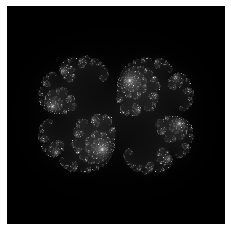

In [14]:
import numpy as np
import matplotlib.pyplot as plt

n = 300 # Evaluamos al conjunto de Julia sobre un array de n*n
max_iter = 1000 # Definimos el número máximo de iteraciones
z_abs_max = 10

# Inicializamos un array vacío (correspondiente en pixeles)
julia = np.zeros((n, n))
# Definimos el tamaño del conjunto de Julia dentro del array
x_size = np.linspace(-1.5, 1.5, n)
y_size = np.linspace(-1.5, 1.5, n)

c = complex(0.285, -0.01)  # Elegimos el valor del parámetro c

for u, x in enumerate(x_size):
    for v, y in enumerate(y_size):
        z = complex(x, y)
        iteration = 0
        while abs(z) <= z_abs_max and iteration < max_iter:
            z = z ** 2 + c  # Función cuadrática
            iteration += 1
        iteration_ratio = iteration / max_iter
        # Marcamos el valor por pixel
        julia[u, v] = iteration_ratio

# Realizamos al visualización del array con la función imshow
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(julia, interpolation='nearest', cmap='gist_gray')
plt.axis('off')
plt.show()

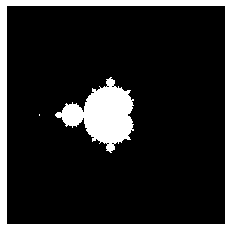

In [15]:
n = 1000  # Evaluamos al conjunto de Mandelbrot sobre un array de n*n
max_iter = 100  # Definimos el número máximo de iteraciones

# Inicializamos un array vacío (correspondiente en pixeles)
mandelbrot = np.zeros((n, n))
# Definimos el tamaño del conjunto de Julia dentro del array
x_size = np.linspace(-2.5, 2.5, n)
y_size = np.linspace(-2.5, 2.5, n)

for u, x in enumerate(x_size):
    for v, y in enumerate(y_size):
        z = 0
        c = complex(x, y)
        for i in range(max_iter):
            z = z ** 2 + c  # Función cuadrática
            if abs(z) > 2.0:
                # Marcamos el valor por pixel
                mandelbrot[v, u] = 1
                break

# Realizamos al visualización del array con la función imshow
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(mandelbrot, interpolation='nearest', cmap='binary')
ax.axis('off')

plt.show()

# Mapeos del intervalo

Pues bien, ahora que contamos con un estudio básico de los sistemas dinámicos discretos, estamos en condiciones de estudiar los *mapeos del intervalo*, estudiaremos entonces funciones $f:[0,1]\to [0,1]$ cuya órbita queda contenida en el interavalo $I$ (recuerde cuando estudiamos la familia cuadrática con parámetro $c<\frac{1}{4}$.

En el contexto de los sistemas dinámicos no lineales, el estudio se reduce a dos funciones: la *función logística* y la *función tienda* (*tent map*, por sus siglas en inglés). Por una parte, la función logístic $h_r:[0,1]\to [0,1]$ esta definida por

$$ h_r(x) = rx(1-x) $$

Y definimos su órbita a partir de la relación de recurrencia:

$$ x_{n+1} = h_r(x_n) = rx_n (1-x_n ) $$

Por otra parte, la función tienda $T_c: [0,1]\to [0,1]$

$$T_c(x) = 
    \begin{cases} 
        cx & 0\leq x < \frac{1}{2}  \\
        c(1-x) & \frac{1}{2} < x \leq 1
    \end{cases} $$

Con órbita definica nuevamente como 

$$ x_{n+1} = T_c(x_n) $$

Note que además podemos definir la función tienda en una sola parte usando el valor absoluto: $T_c(x) = 1 - | 1 - cx|$, programaremos la función de esta forma simplificar su definición.

A continuación definimos las función en general y mostramos las gráficas de $h_4$ y $T_2$.

In [6]:
def logistic(c, x):     # Definición de la función logística
    return c * x * (1 - x)

def tent(c, x):         # Definición de la función tienda
    return 1 - abs( 1 - c * x )

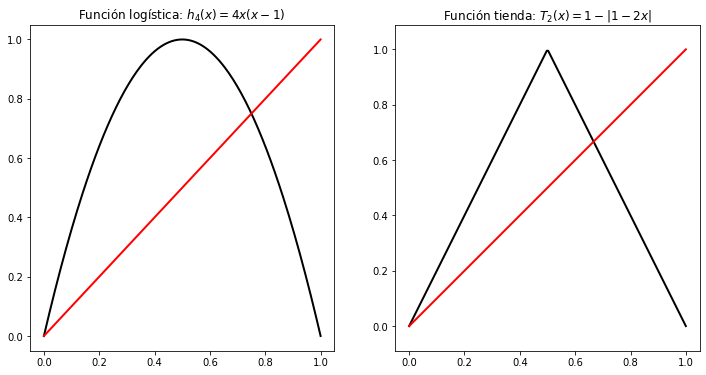

In [7]:
x = np.linspace(0, 1, 200)

# Graficamos la función logística junto a la función tienda
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(x, logistic(4, x), 'k', lw=2)
ax1.plot(x, x, 'r', lw=2)
ax1.set_title('Función logística: $h_4(x) = 4x(x-1)$')

ax2.plot(x, tent(2,x), 'k', lw=2)
ax2.plot(x, x, 'r', lw=2)
ax2.set_title('Función tienda: $T_2(x) = 1-|1-2x|$')

plt.axis('equal')
    
plt.show()

## Familia de mapeos logísticos

Como hemos mencionado, es de nuestro particular interés estudiar las funciones $h_4(x) = 4x(1-x)$ y $T_2(x)=1-|1-2x|$, que se caracterízan por estar definidas supreyectivamente en el intervalo $[0,1]$ y por que su dinámica entro del intervalo queda totalmente contenida. Debido a la basta candidad de resultados obtenidos de la función tienda y la función logística, se suele referirse a ambas como la *familia de mapeos logísticos*, más aún existen generalizaciones que tienen como casos particulaes a la función logística y a la función tienda, a continuación mostramos una caracterizada por dos parámetros $\lambda$ y $\nu$. Definimos 

$$ f( x_n ) = x_{ n+1 } = \lambda (1 - |1 - 2 x_n | ^{ \nu } ) $$

donde $0<\lambda \leq 1$ y $\frac{1}{2} \leq \nu < \infty$ para nuestro estudio consideramos $\frac{1}{2} \leq \nu \leq 2$ y restringimos $\lambda = 1$ para garantizar un régimen ergódico en el intervalo $[0,1]$.  

Nótese lo siguiente:

Si $\nu = 1$, entonces $f(x_n)=1-|1-2x_n|$, ¡la función tienda!

Si $\nu = 2$, entonces $f(x_n)=1-(1-2x_n)^2 = 1 - 1 + 4x_n - 4x_n^2 = 4x_n(1-x_n)$, ¡la función logística!

Además, sí $\nu = \frac{1}{2}$, entonces la fución es tangente a la función identidad en el origen, *i.e*, $f'(0)=1$.

Mostramos la gráfica de la familia de mapeos logísticos para distintos parámetros de $\nu$.

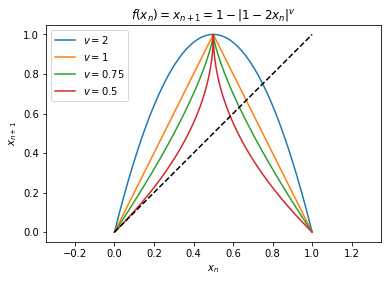

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def log_fam(c, x):
    return 1 - ((abs(1 - 2 * x)) ** c)


x = np.arange(0, 1, 0.0001)

plt.plot(x, log_fam(2, x), label = "$ v = 2 $")
plt.plot(x, log_fam(1, x), label = "$ v = 1 $")
plt.plot(x, log_fam(0.75, x), label = "$ v = 0.75 $")
plt.plot(x, log_fam(0.5, x), label = "$ v = 0.5 $")
plt.plot(x, x, 'k--')

plt.title("$ f(x_n) = x_{n+1} = 1-|1-2x_n|^v  $")
plt.xlabel("$ x_n $")
plt.ylabel("$ x_{n+1} $")
plt.axis('equal')

plt.legend()

plt.show()


Pues bien, tal y como hicimos más arriba con la familia cuadrática, lo que nos queda es hacer un estudio de la dinámica de la familia logística, para caracterizar sus puntos de equilibrio. Enlistaremos algunas características de la dinámica cuando varía el parámetro $r$ y centraremos nuestra atención en el estudio de $h_4$ y $T_2$, que son aquellas funciones que van de $[0,1]$ en $[0,1]$ y cuya dinámica queda completamente contendia en el intervalo, el estudio de estas dos funciones permite introducirnos a la *teoría del caos*, s grandez rasgos se dice que un sistema es caótico cuando no es predecible su comportamiento. Afortunadamente el desarrollo de las matemáticas nos ha permitido acercarnos a esta definición matemáticamente, siendo la definición de Robert Devaney una de las más usadas.

Por otra parte, podemos ver que ambas funciones son muy parecidas, en efecto, la función tienda es una especie de "discretización" de la función logística, y su estudio en conjunto no es casualidad: se puede probar que la dinámica de la función logística $h_r$ es la misma que la función tienda $T_c$ en $[0,1]$, y es de esperarse que el estudio de la función tienda sea más sencillo que el de la funión logística. En términos matemáticos decimos que las funciones son *topológicamente conjugadas*. Para una profundización al respecto, referimos nuevamente a la lectura del libro de Devaney *"An introduction to chaotic dynamical systems"*. Por nuestra parte, trabajaremos indistintamente con ambas funciones en términos de su dinámica. 


## Dinámica de la función logística

A continuación señalamos los puntos más importantes en la dinámica de $h_r$ al variar $r$ para después empezar nuestro estudio de $h_4$, invitamos a corroborar el siguiente listado por el método gráfico. Comenzamos señalando que para todo valor de $r$, la función logística representa una parábola invertida que cruza al eje $X$ en 0 y en 1, y tiene su vértice en el punto $(\frac{1}{2}, \frac{r}{4})$. 

1. Resolviendo la ecuación $rx(1-x)=x$ demuestra que $h_r$ tiene como puntos fijos al $0$ y a $p_r=\frac{r-1}{r}$. Además $1$ y $\frac{1}{r}$ son puntos eventualmente fijos pues $h_r(1)=0$ y $h_r(\frac{1}{r})=p_r$.


2. Si $0<r<1$, entonces $p_r <0$, $p_r$ es un punto fijo repulsor y $0$ es un punto fijo atractor. La cuenca de atracción del $0$ es el $(p_r, \frac{1}{r})$ y todos los puntos en $(-\infty , p_r)$ y $(\frac{1}{r}, \infty )$ divergen.


3. Cuando $r=1$, ocurre una bifurcación nodo-silla, pues $p_1=0$, además $f'(p_1)=1$ y por el método gráfico vemos que se trata de un punto silla atraído por la izquierda en el intervalo $(0,1)$, y todos los los puntos en $(-\infty , 0)\cup (1, \infty )$ divergen. En general para $r\geq 1$, todos los puntos en $(-\infty , 0)\cup (1, \infty )$ divergen.


4. Si $1<r<3$, entonces $0$ es un punto fijo repulsor, $p_r$ es un punto fijo atractor con cuenca de atracción $(0,1)$.


5. Si $r=3$, $h_r$ obtiene un punto periódico de periodo $2$ (*i.e* ocurre una bifurcación por duplicación de periodo) y $p_r$ es el único atractor, pero el punto fijo $0$ sigue siendo repulsor. La cuenca de atracción de $p_r$ es $(0,1)$.


6. Si $3<r<1+\sqrt{6} \sim 3.44$, ocurre otra bifurcación por duplicación de periodo, y $p_r$ pasa de ser un punto fijo atractor a un repulsor, este hecho se mantiene para todo $r>3$.


7. En el intervalo $1 + \sqrt{6} < r \leq 4$ existe una órbita de periodo 3 siempre que $r> 1 + \sqrt{8}$, y por el teorema de Sharkovskii, se sigue que existen órtbitas de todos los periodos. 


8. Si $r=4$, la dinámica de la función es caótica.


9. Si $r>4$ se puede probar que todos los puntos que se mantienen en $[0,1]$ bajo iteración de $h_r$ forman un conjunto de Cantor y todos los puntos dentro tienen una órbita caótica. El estudio de este caso da pie a la llamada *dinámica simbólica*.

![Periodo 3](imagenes/log4.png)

# Bifurcaciones

Hemos visto que la dinámica de la función logística es simple cuando $0<r<3$, el mayor interés esta entonces cuando $3<r<4$. A continuación veremos cómo es que sucede esa transición en $r=3$. Hasta ahora hemos realizado el método gráfico sobre las funcione que definen los sistemas dinámicos, sin embargo, también resulta de mucha utilidad realizar el método gráfico no para la función original directamente si no para su iteración.

## Iteradas de orden superior

A continuación mostramos un código que permite visualizar la $n$-ésima iteración de la función loǵistica.

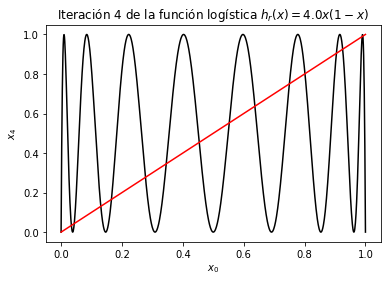

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def iter_log(c, x0, n):
    """ n-ésima iteración de la función logística con parámetro c 
        y condición inicial x0. Regresa un array de dimensión 1*n """
    y = np.array([ ])
    for i in range(n):           # Iniciamos la iteración
        x1 = c * x0 * (1 - x0)   # Definición de la función logística
        y = np.append(y, x0)
        x0 = x1
    return(y)


x = np.linspace(0, 1, 1000)   # Dominio de la función
m = len(x)
n = 4       # Número de interaciones. Dimensión de la matriz de datos
c = 4       # Valor del parámetro


matrix = np.zeros((m, n+1))

for i in range(m):
    matrix[i, :] = iter_log(c, x[i], n+1)   # Inserta el array de 1*n en una fila de la matriz

plt.plot(x, matrix[:, -1], 'k')
plt.plot(x, x, 'r')

plt.title(f'Iteración {n:d} de la función logística $ h_r(x)= {c:.1f} x(1-x) $' )
plt.xlabel("$ x_0 $")
plt.ylabel("$ x_%d $" % n)
#plt.axis('equal')

plt.show()

Notese que si una función tiene un punto periódico de periodo 2 $x_0$, entonces $x_0$ será un punto fijo para $f^2$. Esta idea nos proporciona un método inteligente para estudiar algunos puntos periódicos de una función por el método gráfico, al inspeccionar los puntos fijos de una iteración que no sean puntos fijos en las iteraciones anteriores.

Lo primero que haremos es estudiar los puntos periódicos de periodo dos de la función logísica cuando el parámetro pasa por $r=3$.

![Segunda iteración](imagenes/log_2.png)

Como podemos apreciar en la imagen, la función pasa de cruzar a la identidad en dos puntos (incluyendo al origen) a cruzarla en cuatro puntos cuando $r>3$. Este es otro caso de una bifurcación tangente o nodo-silla, y lo que indica es que la función pasa de tener un punto periódico de periodo 2 (aquí no incluímos al origen por ser punto fijo de $h$), a tener tres puntos periódicos de periodo dos, por eso es que más arriba dijimos que en $r=3$ ocurría una bifurcación por duplicación de periodo.

Ahora analicemos lo que ocurre cuando analizamos iteradas de orden superior, en particular analizaremos el caso en que $r=4$ y dejaremos la exporación de las iteradas de orden superior para otros valores de $r$ entre $3$ y $4$.

![n-ésima iteración](imagenes/log_n.png)

Para la tercera y cuarta iteración ocurre que el periodo de la onda aumenta y con eso, el número de veces que interseca a la identidad. Ese aumento es exactamente de $2^n$ para la $n$-ésima iteración, y como consecuencia tenemos que un punto fijo en la 3ra iteración es un punto periódico de periodo 2 para la 2da y por lo tanto periódico de periodo 4 para la función original. En general, un punto fijo para la $n-ésima iterada$ es un punto periódico de periodo $2^{n-1}$ para la función original.

Ese comportamiento indica que $h_r$ tiene puntos periódicos de periodo $2^n$ para todo $n$ natural, y la tendencia del parámetro cuando se aproxima a $r=4$ es a lo que se le conoce como *ruta al caos por duplicación de periodo*.

## Diagrama de bifurcación y exponente de Lyapunov

Terminamos este artículo introduciendo una método de visualizar y estudiar la ruta del caos: el diagrama de bifurcación y el exponente de Lyapunov.

La idea del diagrama de bifurcación es realmente sencilla: graficaremos el número de puntos periódicos de la función logística respecto a su parámetro $r$.

El proceso para construir el diagrama de bifurcación es el siguiente:

1. Tomamos $n$ valores de $r$ igualmente espaciados: $r_1,\ ...\ r_n$ en el intervalor $(0, 4)$ (o en cualquier rango del parámetro que nos interese analizar), $n=10,000$ es una cantidad recomendada.


2. Determinamos el número de iteraciones, en este caso analizaremos 1000 iteraciones de $h_r$ y guardamos las últimas 100 para disponer el diagrama.
    
    
3. Para cada $r_j$ computa la órbita de de un valor inicial, tomemos $x_0=0.00001$.


4. Luego para disponer el diagrama de bifurcación , dibujamos un pixel por punto durante las últimas 100 iteraciones.
    
    
Una de las características principales de los sistemas caóticos es la *sensibilidad a las condiciones iniciales*. Si dos puntos cercanos uno a otro se desvían conforme a las iteraciones de una función, es una señal de que el sistema es caótico.La razón a la que se desvían dos trayectorias esta caracterizada por una cantidad llamada el *exponente de Lyapunov*. Aquí discutiremos el exponente de Lyapunov para la función logística.

Considere dos iteraciones de la función logística empezando por dos valores de $x$ relativamente cercanos, supongamos $x_0$ y $x_0+\delta x_0$. Esto mapea a $x_1$ y $x_1+\delta x_1,\ ...,\ x_n+\delta x_n$. Expandiendo $f(x)$ al rededor de $x_n$, tenemos 

$$ \delta x_n = f'(x_{n-1})\delta x_{n-1}$$

asumiendo que $\delta x_n$ es suficientemente pequeño. Por lo tanto la separación de las dos órbitas después de $n$ iteraciones, $\delta x_n$, esta relacionado con su separación inicial $\delta x_0$

$$\frac{\delta x_n}{\delta x_0} = \prod_{i=0}^{n-1} |f'(x_i) |$$

Esperamos que esto varíe exponencialmente para $n$ grande como

$$\frac{\delta x_n}{\delta x_0} = e^{\lambda_L n}$$

Y definimos entonces al *exponente de Lyapunov* $\lambda_L$ como

$$\lambda_L = \lim_{n\to \infty}\frac{1}{n}\sum_{i=0}^n ln|f'(x)|$$

Si $\lambda_L > 0$ las órbitas vecinas divergen una de la otra conforme $n$ crece, lo que indica caos. Mientras que si las órbitas convergen a un punto fijo o a uno periodico, las órbitas se harán cercanas y $\lambda_L < 0$.

Por lo tanto podemos determinar si un sistema es caótico o no por medio del signo del exponente de Lyapunov. 

Abajo disponemos el diagrama de bifurcación de la función logística junto con el exponente de Lyapunov variando el parámetro desde 2.5 hasta 4, note como, en efecto, para $r=4$ la dinámica indica caos, sin embargo también podemos notar que eso es igualmente cierto incluso para valores menores que 4, y algunos puntos aislados como para $r=3$, que tal y como indicamos arriba presenta una bifurcación por duplicación de periodo, el siguiente código fue tomado de [6] aplicando ligeras modificaciones.

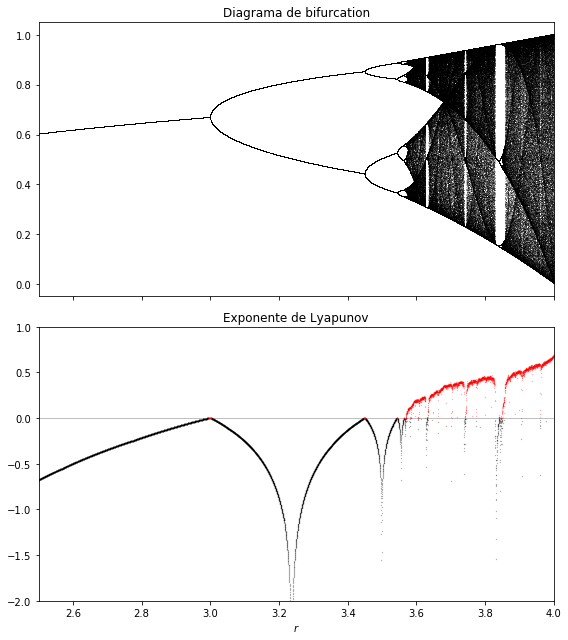

In [10]:
n = 10000
r_min = 2.5      # Disponemos el diagrama para r en ( r_min, r_max )
r_max = 4
r = np.linspace(r_min, r_max, n)

iterations = 1000
last = 100

x = 1e-5 * np.ones(n)

lyapunov = np.zeros(n) # Inicializamos el vector de Lyapunov

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # Computamos las sumas parciales del exponente de Lyapunov
    lyapunov += np.log(abs(r - 2 * r * x))
    # Disponemos el diagrama de bifurcación.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Diagrama de bifurcation")


# Disponemos el exponente de Liapunov.

ax2.axhline(0, color='k', lw=.5, alpha=.5) # Eje X
# Exponente de Liapunov negrativo, en color negro
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)

# Exponente de Liapunov positivo, en color rojo
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)

ax2.set_xlim(r_min, r_max)
ax2.set_ylim(-2, 1)
ax2.set_title("Exponente de Lyapunov")

plt.xlabel("$ r $")

plt.tight_layout()

# Bibliografía 
1. Devaney, R. (1948). An Introduction to Chaotic Dynamical Systems. (2nd ed.). Boston: Addison-Wesley Publishing Company, Inc.


2. Devaney, R. (1989) Chaos, Fractals and Dynamics: Computer Experiments in Mathematics. Boston: Addison-Wisley.


3. Hirsch, M., Smale, S., Devaney, R. (1933). Differential Equations, Dynamical Systems and an Introduction to Chaos. (2nd ed.). California: Elsevier.


4. Axler, S., Gehring, F. and Ribet, K. (1996). A First Course in Discrete Dynamical Systems. (2nd ed.). New York: Springer Verlag.


5. Lynch, S. (2018). Dynamical Systems with Applications using Python. Switzerland: Birkhäuser.


6. Rossant, C. (2018). IPython Interactive Computing and Visualization Cookbook. (2nd ed.). Birmingham: Packt.


7. King, J., Méndez, H. (2014). Sistemas dinámicos discretos. Ciudad de México: Prensas de Ciencias.


8. Downey, A. ET.AL. (2002). How to Think Like a Computer Scientist. Learning with Python 3. Wellesley, Massachusetts: Green Tea Press.


9. Shaw, Z. (2010). Learn Python The Hard Way (3th ed.). Boston: Addison-Wesley.


10. Alvarez-Martinez, R., Cocho, G., Martinez-Mekler, G. (2018). Rank ordered beta distributions of nonlinear map symbolic dynamics families with a first-order transition between dynamical regimes. Chaos 28, 075515 (2018); doi: 10.1063/1.5027784.


11. Martı́nez-Mekler G, Martı́nez RA, del Rı́o MB, Mansilla R, Miramontes P, et al. (2009) Universality of Rank-Ordering Distributions in the Arts and Sciences. PLoS ONE 4(3): e4791. doi:10.1371/journal.pone.0004791.